<a href="https://colab.research.google.com/github/aniket17022004/EDA-assignment-work/blob/main/21BDS0350.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Import required libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

**Load dataset**

In [2]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/smoking.csv"
df = pd.read_csv(url)



**Display first few records**



In [3]:
df.head()

,rownames,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


**Dataset dimensions**

In [4]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 1691 rows and 13 columns.


**Data types and missing values**

In [5]:
df.info()
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rownames               1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB

Missing Values:
 rownames                    0
g

**Handling missing values**

In [6]:
df.dropna(inplace=True)


**Duplicate check**

In [7]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")



Duplicate Rows: 0


**Separating numerical and categorical columns**

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['rownames', 'age', 'amt_weekends', 'amt_weekdays']
Categorical Columns: ['gender', 'marital_status', 'highest_qualification', 'nationality', 'ethnicity', 'gross_income', 'region', 'smoke', 'type']


**Convert Categorical Variables to Proper Datatypes**

In [10]:
categorical_cols = ['gender', 'marital_status', 'highest_qualification', 'nationality',
                    'ethnicity', 'gross_income', 'region', 'smoke', 'type']
df[categorical_cols] = df[categorical_cols].astype('category')

**Summary Statistics**

In [11]:
print("\n🔹 Summary Statistics:\n", df.describe())



🔹 Summary Statistics:
           rownames         age  amt_weekends  amt_weekdays
count   421.000000  421.000000    421.000000    421.000000
mean    890.524941   42.714964     16.410926     13.750594
std     510.876765   16.179631      9.892988      9.388292
min       2.000000   16.000000      0.000000      0.000000
25%     453.000000   30.000000     10.000000      7.000000
50%     924.000000   40.000000     15.000000     12.000000
75%    1342.000000   54.000000     20.000000     20.000000
max    1690.000000   93.000000     60.000000     55.000000


**Univariate Analysis (Histograms)**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


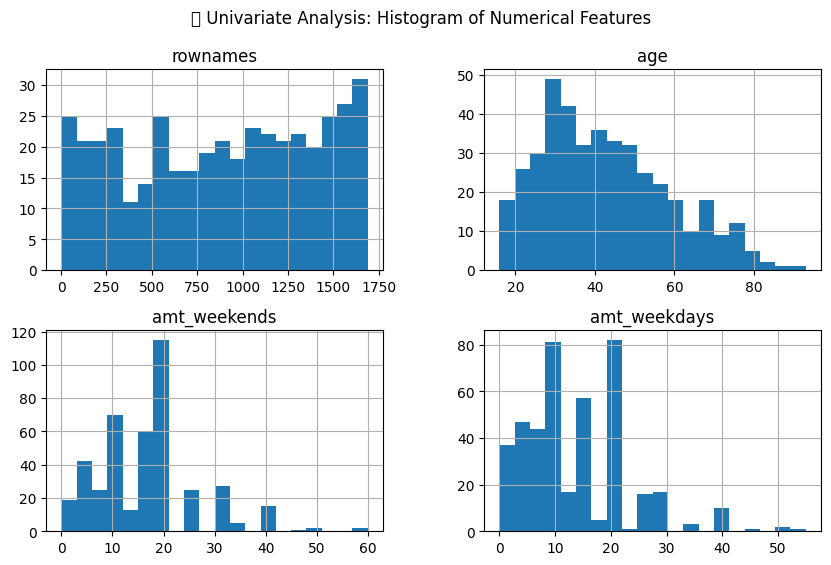

In [13]:
df.hist(figsize=(10, 6), bins=20)
plt.suptitle("🔹 Univariate Analysis: Histogram of Numerical Features")
plt.show()

**Boxplots for Outliers**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


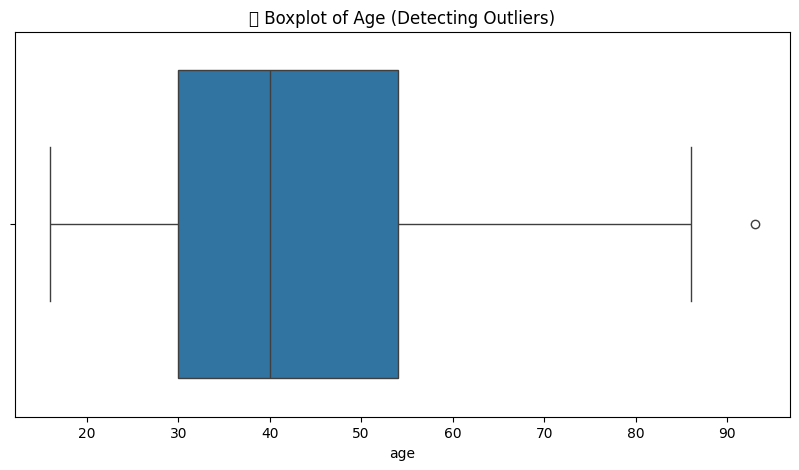

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["age"])
plt.title("🔹 Boxplot of Age (Detecting Outliers)")
plt.show()

**Bivariate Analysis (Pairplot)**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


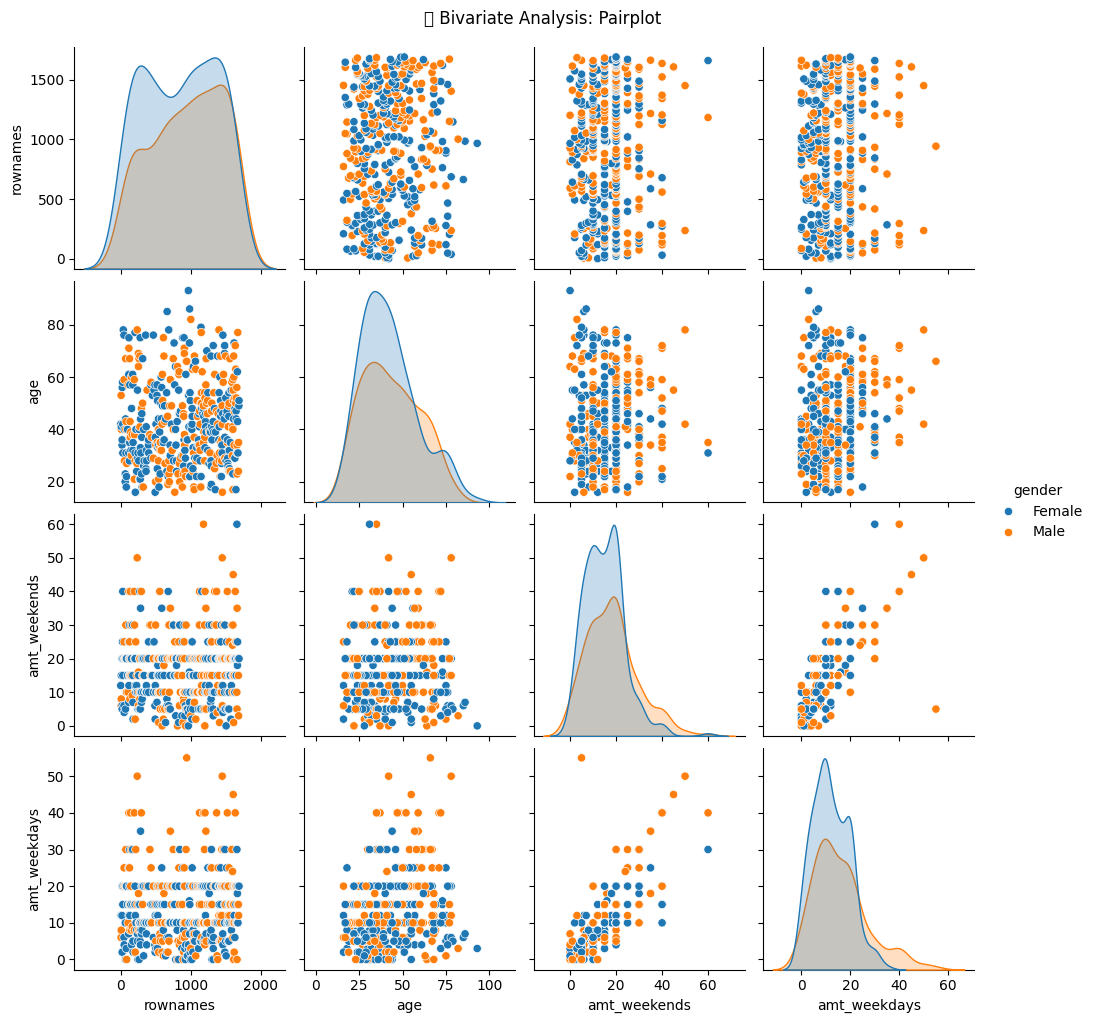

In [15]:
sns.pairplot(df, diag_kind="kde", hue="gender")
plt.suptitle("🔹 Bivariate Analysis: Pairplot", y=1.02)
plt.show()

**Correlation Heatmap (Multivariate Analysis)**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


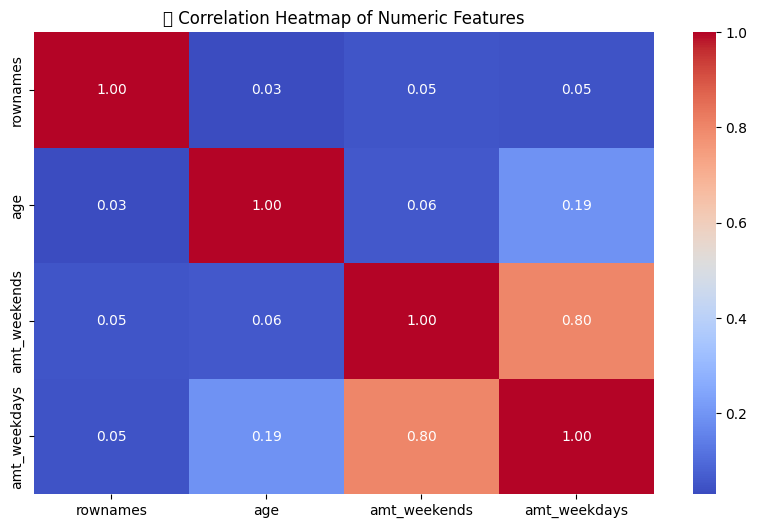


✅ Analysis Completed Successfully! 


In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("🔹 Correlation Heatmap of Numeric Features")
plt.show()

print("\n✅ Analysis Completed Successfully! ")